In [1]:
print("Hello world!")

Hello world!


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import os
import re

In [4]:
print(os.getcwd())

C:\Users\nadia\Untitled Folder


#### Mantis dataset

In [159]:
# training set
mantis_dir = 'mantis_rus_dataset'
dirs2check = ["train"]
file_pair = {}
root_dir = ''
for d2check in dirs2check:
    for fname in os.listdir(os.path.join(root_dir, mantis_dir, d2check)):
        name = os.path.join(d2check, fname.split(".")[0])
        file_pair[name] = file_pair.get(name, []) + [fname]

In [161]:
texts = []
manips = []
for k, v in file_pair.items():
    with open(os.path.join(root_dir, mantis_dir, k + ".txt"), "r", encoding="utf8") as f:
        texts.append("".join(f.readlines()))
                            
    with open(os.path.join(root_dir, mantis_dir, k + ".labels.tsv"), "r", encoding="utf8") as f:
        manips.append(f.readlines())

In [163]:
mantis_df = pd.DataFrame({"Content": texts, "manipulations": manips}, columns=["Content", "manipulations"])

In [165]:
mantis_df

,Content,manipulations
0,Чернигов прилет во многоэтажку. Говорят русска...,[00000_03514\tAppeal_to_fear-prejudice\t139\t1...
1,Председатель Следственного комитета РФ Алексан...,"[00002_06059\tAppeal_to_Authority\t0\t76\n, 00..."
2,«К военным подошли бабушки и попросили убрать ...,"[00004_00901\tFlag-Waving\t19\t38\n, 00004_009..."
3,"С уважение отношусь к Лобаеву, но Владислав, е...","[00006_06251\tLoaded_Language\t186\t204\n, 000..."
4,⚠️ ? Зафиксирован обстрел со стороны ВФУ по на...,[]
...,...,...
874,"?? ?? ? Появились цели захватить Москву, Чечню...",[08891_03363\tAppeal_to_Authority\t56\t130\n]
875,"В украинских пабликах пишут, что российский сп...",[08892_01638\tThought-terminating_Cliches\t125...
876,"Сообщается, что в дом попала ракета ПВО ВС Укр...",[08893_03217\tAppeal_to_Authority\t0\t10\n]
877,"В Росавиации сообщили , что с сегодняшнего дн...",[08896_08921\tStraw_Men\t396\t506\n]


In [167]:
# dev set
mantis_dir = 'mantis_rus_dataset'
dirs2check = ["dev"]
file_pair = {}
root_dir = ''
for d2check in dirs2check:
    for fname in os.listdir(os.path.join(root_dir, mantis_dir, d2check)):
        name = os.path.join(d2check, fname.split(".")[0])
        file_pair[name] = file_pair.get(name, []) + [name]

texts = []
manips = []
for k, v in file_pair.items():
    with open(os.path.join(root_dir, mantis_dir, k + ".txt"), "r", encoding="utf8") as f:
        texts.append("".join(f.readlines()))
                            
    with open(os.path.join(root_dir, mantis_dir, k + ".labels.tsv"), "r", encoding="utf8") as f:
        manips.append(f.readlines())

mantis_dev = pd.DataFrame({"Content": texts, "manipulations": manips}, columns=["Content", "manipulations"])

In [23]:
mantis_dev['Content'].loc[10]

'#ПрямоСейчас глава пресс-службы Пентагона Джон Кирби проводит брифинг по ситуации на Украине. \n\nВидео: ТАСС/ Ruptly\n\nПодписывайтесь на ТАСС: http://www.youtube.com/c/TASSagency/?sub_confirmation=1\n\nНаш сайт: https://tass.ru/\nМы ВКонтакте: https://vk.com/tassagency\nМы в Facebook: https://www.facebook.com/tassagency/\nМы в Instagram: https://www.instagram.com/tass_agency/\nМы в Одноклассниках: https://ok.ru/tassagency\nМы в Twitter: https://twitter.com/tass_agency\nМы в Telegram: https://t.me/tass_agency\nМы в Viber: https://vb.me/tass_agency\n\n#Украина #Пентагон #СитуацияНаУкраине #ПентагонОСитуацииНаУкраине #НовостиУкраины #НовостиРоссии #МироваяПолитика #ВМире #НовостиМира'

In [169]:
# validation set
file_pair = {}
for fname in os.listdir(os.path.join(root_dir, mantis_dir, "test")):
    name = os.path.join("test", fname.split(".")[0])
    file_pair[name] = file_pair.get(name, []) + [fname]
    
texts = []
manips = []
for k, v in file_pair.items():
    with open(os.path.join(root_dir, mantis_dir, k + ".txt"), "r", encoding="utf8") as f:
        texts.append("".join(f.readlines()))
                            
    with open(os.path.join(root_dir, mantis_dir, k + ".labels.tsv"), "r", encoding="utf8") as f:
        manips.append(f.readlines())

mantis_val = pd.DataFrame({"Content": texts, "manipulations": manips}, columns=["Content", "manipulations"])

In [173]:
mantis_dev

,Content,manipulations
0,«Финляндия готовится закрыть воздушное простра...,[]
1,Корреспондент РИА Новости показывает последств...,[]
2,"Столтенберг верит, что война на Украине не рас...",[]
3,⚡️ Военнослужащие ЛНР без боя освободили два к...,[]
4,⚡ ❗ Ещё один мирный житель ранен в Горловке,[00085_01092\tAppeal_to_fear-prejudice\t4\t32\n]
...,...,...
121,Принято решение отключать РФ от SWIFT - МИД Ук...,"[08848_08668\tRed_Herring\t53\t88\n, 08848_086..."
122,"В ДНР заявили, что украинские силовики обстрел...","[08855_04438\tExaggeration,Minimisation\t2\t5\..."
123,Франция намерена принять меры по борьбе с расп...,[]
124,Макрон созывает на 19:00 мск Совет обороны стр...,"[08878_04343\tName_Calling,Labeling\t62\t72\n]"


In [27]:
mantis_val

,Content,manipulations
0,⚡️ ⚡️ ⚡️ СРОЧНО ⚡️ ⚡️ ⚡️ Ровеньки. На месте ра...,[00005_09366\tLoaded_Language\t0\t24\n]
1,Столица Украины пустеет в связи с военной опер...,"[00007_05743\tExaggeration,Minimisation\t34\t5..."
2,Тотальный ШТУРМ Харькова! ?? Сейчас в Харькове...,"[00012_06628\tExaggeration,Minimisation\t0\t9\..."
3,"? ?? Некрасиво, конечно. Понимаю.",[]
4,⚡️ Вечерний брифинг Минобороны России по ситуа...,"[00019_00915\tExaggeration,Minimisation\t57\t6..."
...,...,...
242,Оскароносный режиссер Дэвид Линч высказался о ...,[]
243,⚡️ Кадыров подтвердил развертывание чеченских ...,"[08876_03334\tName_Calling,Labeling\t60\t70\n]"
244,❗️ ⚡️ ПОШЛА ВОДА В КРЫМ - взорвана выстроенная...,"[08879_02714\tExaggeration,Minimisation\t125\t..."
245,⚡️ ⚡️ ⚡️ Американская социальная сеть Instagra...,[]


In [175]:
# Regex pattern to match the sequence
pattern = r'\d{5}_\d{5}\t'
# Function to clean each list in the DataFrame
def clean_list(lst):
    return [re.sub(pattern, '', item) for item in lst]



In [ ]:
# Apply the cleaning function to each row in the 'column_name' column

In [177]:
mantis_df['manipulations'] = mantis_df['manipulations'].apply(clean_list)

In [179]:
mantis_val['manipulations'] = mantis_val['manipulations'].apply(clean_list)

In [181]:
mantis_dev['manipulations'] = mantis_dev['manipulations'].apply(clean_list)

#### EMNLP Dataset

In [183]:
emnlp_dir = 'emnlp_en_dataset'
dirs2check = ["train"]
file_pair = {}
root_dir = ''
for d2check in dirs2check:
    for fname in os.listdir(os.path.join(root_dir, emnlp_dir, d2check)):
        name = os.path.join(d2check, fname.split(".")[0])
        file_pair[name] = file_pair.get(name, []) + [fname]

In [185]:
texts = []
manips = []
for k, v in file_pair.items():
    with open(os.path.join(root_dir, emnlp_dir, k + ".txt"), "r", encoding="utf8") as f:
        texts.append("".join(f.readlines()))
                            
    with open(os.path.join(root_dir, emnlp_dir, k + ".labels.tsv"), "r", encoding="utf8") as f:
        manips.append(f.readlines())

In [187]:
emnlp_df = pd.DataFrame({"Content": texts, "manipulations": manips}, columns=["Content", "manipulations"])

In [189]:
emnlp_df

,Content,manipulations
0,US bloggers banned from entering UK\n\nTwo pro...,"[111111112\tSlogans\t191\t221\n, 111111112\tBl..."
1,Kate Steinle's death at the hands of a Mexican...,"[111111113\tLoaded_Language\t1396\t1430\n, 111..."
2,Kavanaugh Nomination Is Exploding in Trump’s F...,"[111111122\tExaggeration,Minimisation\t170\t20..."
3,Agencies scramble to prep Russia probe files f...,"[111111124\tLoaded_Language\t2650\t2662\n, 111..."
4,Trump's North Korean gamble ends with 'special...,"[111111131\tName_Calling,Labeling\t398\t413\n,..."
...,...,...
288,Top Florida County Election Official Illegally...,[999001293\tThought-terminating_Cliches\t409\t...
289,Altered Election Documents Tied To Florida Dem...,"[999001296\tLoaded_Language\t86\t102\n, 999001..."
290,Migrant Caravan Reach Border & Climb Atop Fenc...,"[999001297\tRepetition\t2257\t2277\n, 99900129..."
291,Guardian ups its vilification of Julian Assang...,"[999001619\tDoubt\t8322\t8539\n, 999001619\tNa..."


In [191]:
# validation set
file_pair = {}
for fname in os.listdir(os.path.join(root_dir, emnlp_dir, "test")):
    name = os.path.join("test", fname.split(".")[0])
    file_pair[name] = file_pair.get(name, []) + [fname]
    
texts = []
manips = []
for k, v in file_pair.items():
    with open(os.path.join(root_dir, emnlp_dir, k + ".txt"), "r", encoding="utf8") as f:
        texts.append("".join(f.readlines()))
                            
    with open(os.path.join(root_dir, emnlp_dir, k + ".labels.tsv"), "r", encoding="utf8") as f:
        manips.append(f.readlines())

emnlp_val = pd.DataFrame({"Content": texts, "manipulations": manips}, columns=["Content", "manipulations"])

In [193]:
emnlp_dir = 'emnlp_en_dataset'
dirs2check = ["dev"]
file_pair = {}
root_dir = ''
for d2check in dirs2check:
    for fname in os.listdir(os.path.join(root_dir, emnlp_dir, d2check)):
        name = os.path.join(d2check, fname.split(".")[0])
        file_pair[name] = file_pair.get(name, []) + [fname]

texts = []
manips = []
for k, v in file_pair.items():
    with open(os.path.join(root_dir, emnlp_dir, k + ".txt"), "r", encoding="utf8") as f:
        texts.append("".join(f.readlines()))
                            
    with open(os.path.join(root_dir, emnlp_dir, k + ".labels.tsv"), "r", encoding="utf8") as f:
        manips.append(f.readlines())

emnlp_dev = pd.DataFrame({"Content": texts, "manipulations": manips}, columns=["Content", "manipulations"])

In [195]:
emnlp_dev.size

114

In [48]:
emnlp_df.head()

,Content,manipulations
0,Next plague outbreak in Madagascar could be 's...,"[111111111\tAppeal_to_Authority\t265\t323\n, 1..."
1,Here are all the sexual misconduct accusations...,"[111111115\tLoaded_Language\t658\t700\n, 11111..."
2,Trump formally nominates Gina Haspel to be nex...,[111111117\tCausal_Oversimplification\t671\t75...
3,Dallas Police Dept.\n fires officer who killed...,[]
4,Domestic abuse allegations against Keith Ellis...,[111111123\tLoaded_Language\t4321\t4334\n]


In [50]:
emnlp_val

,Content,manipulations
0,Next plague outbreak in Madagascar could be 's...,"[111111111\tAppeal_to_Authority\t265\t323\n, 1..."
1,Here are all the sexual misconduct accusations...,"[111111115\tLoaded_Language\t658\t700\n, 11111..."
2,Trump formally nominates Gina Haspel to be nex...,[111111117\tCausal_Oversimplification\t671\t75...
3,Dallas Police Dept.\n fires officer who killed...,[]
4,Domestic abuse allegations against Keith Ellis...,[111111123\tLoaded_Language\t4321\t4334\n]
...,...,...
95,"Hey, Self Proclaimed ""Fact Checkers"" and Mains...","[999001280\tLoaded_Language\t938\t949\n, 99900..."
96,Judge Orders White House To Restore Jim Acosta...,"[999001290\tRed_Herring\t752\t769\n, 999001290..."
97,Not Surprising: Now Fox News Is Supporting CNN...,"[999001299\tFlag-Waving\t2270\t2285\n, 9990012..."
98,Court orders White House to restore CNN corres...,"[999001323\tLoaded_Language\t2481\t2487\n, 999..."


In [197]:
# Regex pattern to match the sequence
pattern = r'\d{9,10}\t'
# Function to clean each list in the DataFrame
def clean_list(lst):
    return [re.sub(pattern, '', item) for item in lst]



In [199]:
# Apply the cleaning function to each row in the 'column_name' column
emnlp_df['manipulations'] = emnlp_df['manipulations'].apply(clean_list)

In [201]:
emnlp_val['manipulations'] = emnlp_val['manipulations'].apply(clean_list)

In [203]:

emnlp_dev['manipulations'] = emnlp_dev['manipulations'].apply(clean_list)

In [205]:
emnlp_df.head()

,Content,manipulations
0,US bloggers banned from entering UK\n\nTwo pro...,"[Slogans\t191\t221\n, Black-and-White_Fallacy\..."
1,Kate Steinle's death at the hands of a Mexican...,"[Loaded_Language\t1396\t1430\n, Name_Calling,L..."
2,Kavanaugh Nomination Is Exploding in Trump’s F...,"[Exaggeration,Minimisation\t170\t206\n, Exagge..."
3,Agencies scramble to prep Russia probe files f...,"[Loaded_Language\t2650\t2662\n, Loaded_Languag..."
4,Trump's North Korean gamble ends with 'special...,"[Name_Calling,Labeling\t398\t413\n, Name_Calli..."


In [59]:
emnlp_val

,Content,manipulations
0,Next plague outbreak in Madagascar could be 's...,"[Appeal_to_Authority\t265\t323\n, Appeal_to_Au..."
1,U.S. judge frees Indonesian immigrant held by ...,"[Appeal_to_fear-prejudice\t1705\t1826\n, Obfus..."
2,Here are all the sexual misconduct accusations...,"[Loaded_Language\t658\t700\n, Loaded_Language\..."
3,Trump formally nominates Gina Haspel to be nex...,[Causal_Oversimplification\t671\t754\n]
4,Dallas Police Dept.\nfires officer who killed ...,[]
...,...,...
96,"Hey, Self Proclaimed ""Fact Checkers"" and Mains...","[Loaded_Language\t938\t949\n, Loaded_Language\..."
97,Judge Orders White House To Restore Jim Acosta...,"[Red_Herring\t752\t769\n, Name_Calling,Labelin..."
98,Not Surprising: Now Fox News Is Supporting CNN...,"[Flag-Waving\t2270\t2285\n, Repetition\t2415\t..."
99,Court orders White House to restore CNN corres...,"[Loaded_Language\t2481\t2487\n, Loaded_Languag..."


In [233]:
df = emnlp_df[emnlp_df['Content'].str.contains('Homeschooling Protects')] 
print(df) 

                                               Content  \
23   Homeschooling Protects Children from Violence ...   
215  Homeschooling Protects Children from Violence ...   

                                         manipulations  
23   [7Appeal_to_fear-prejudice\t72\t85\n, 7Repetit...  
215  [Loaded_Language\t37\t45\n, Loaded_Language\t7...  


In [249]:
emnlp_df['manipulations'].loc[23]

['Appeal_to_fear-prejudice\t72\t85\n',
 'Repetition\t388\t397\n',
 'Repetition\t406\t415\n',
 'Repetition\t441\t449\n',
 'Repetition\t607\t614\n',
 'Repetition\t716\t726\n',
 'Repetition\t839\t846\n',
 'Repetition\t1788\t1797\n',
 'Repetition\t4169\t4180\n',
 'Slogans\t225\t241\n',
 'Loaded_Language\t207\t215\n',
 'Repetition\t3272\t3286\n',
 'Repetition\t4271\t4284\n']

#### Analyzing datasets

In [13]:
mantis_df["length"] = mantis_df["Content"].str.len()

In [14]:
mantis_sorted = mantis_df.sort_values(by='length', ascending=False)

In [15]:
mantis_sorted

,Content,manipulations,length
821,⚡️ ?? ?? Общие итоги третьего дня Z Военная об...,"[01033_01061\tExaggeration,Minimisation\t15\t3...",4091
846,"Спрашивают, как не захлебнуться в информационн...","[01070_09076\tSlogans\t307\t317\n, 01070_09076...",3981
963,"#РусскийШепот Пётр, Симферополь Всю сознател...","[08837_06398\tExaggeration,Minimisation\t370\t...",3971
95,"#РусскийШепот Евгений из Израиля. Израиль, та...",[00993_06387\tCausal_Oversimplification\t95\t1...,3597
69,Пишет Елена Лаваль (Донецк). =================...,"[00694_02816\tAppeal_to_Authority\t0\t18\n, 00...",2958
...,...,...,...
797,"Всем ""русским""",[],14
210,@lebedevalive,[],13
372,ebay и ЛДНР.,"[00358_01773\tExaggeration,Minimisation\t5\t11\n]",12
18,Бой в Киеве,[],11


In [16]:
emnlp_df["length"] = emnlp_df["Content"].str.len()
emnlp_sorted = emnlp_df.sort_values(by='length', ascending=False)

In [64]:
emnlp_sorted

,Content,manipulations,length
296,"Archbishop Viganò Speaks, the Neo-Catholics Pa...","[783702663\tLoaded_Language\t886\t906\n, 78370...",47706
294,Former Apostolic Nuncio to the United States A...,"[782086447\tLoaded_Language\t7126\t7137\n, 782...",43275
202,Pope Francis vs Contemplative Orders\n \n The ...,"[758386255\tLoaded_Language\t1495\t1500\n, 758...",32220
136,FOR THE FIRST TIME ONLINE: Archbishop Lefebvre...,"[728972961\tLoaded_Language\t4679\t4735\n, 728...",31708
142,"SPECIAL REPORT: Papal Cover-up Alleged, Pope A...","[729578579\tDoubt\t645\t742\n, 729578579\tThou...",27128
...,...,...,...
166,Brazilian arms dealer arrested in the United S...,"[733754480\tAppeal_to_Authority\t91\t149\n, 73...",914
219,Trump suggests he would have picked another AG...,"[761780613\tLoaded_Language\t783\t834\n, 76178...",910
51,Watch: Campus Commie Has Profanity-Laden Hissy...,"[999000565\tLoaded_Language\t297\t308\n, 99900...",840
155,60 Illegal Aliens Apprehended In Texas Stash H...,[],825


In [ ]:
emnlp_sorted['Content'].iloc[0]

In [18]:
mantis_df.shape

(1007, 3)

In [19]:
emnlp_df.shape

(350, 3)

#### Concatenating datasets

In [89]:
mantis_df.to_csv("mantis.csv", index=False)
mantis_val.to_csv("mantis_val.csv", index=False)
emnlp_df.to_csv("emnlp.csv", index=False)
emnlp_val.to_csv("emnlp_val.csv", index=False)

In [241]:
prop_df = pd.concat([mantis_df, emnlp_df], ignore_index=True)

In [107]:
prop_df.describe()

,Content,manipulations
count,1172,1172
unique,1168,831
top,Ex-Sailor Pardoned By Trump Says He’s SUING Ob...,[]
freq,2,333


In [243]:
prop_val = pd.concat([mantis_val, emnlp_val], ignore_index=True)

In [245]:
prop_dev = pd.concat([mantis_dev, emnlp_dev], ignore_index=True)

In [209]:
prop_dev

,Content,manipulations
0,«Финляндия готовится закрыть воздушное простра...,[]
1,Корреспондент РИА Новости показывает последств...,[]
2,"Столтенберг верит, что война на Украине не рас...",[]
3,⚡️ Военнослужащие ЛНР без боя освободили два к...,[]
4,⚡ ❗ Ещё один мирный житель ранен в Горловке,[Appeal_to_fear-prejudice\t4\t32\n]
...,...,...
178,“They All Look The Same” – Hillary Cracks Raci...,"[Thought-terminating_Cliches\t1361\t1376\n, Lo..."
179,Democrat’s Friend Louis Farrakhan In Iran: “De...,"[Repetition\t225\t242\n, Slogans\t44\t92\n, Sl..."
180,"Gillum Makes Promises He Can’t Keep, “that’s n...","[Name_Calling,Labeling\t491\t526\n, Name_Calli..."
181,Caught on video: Gillum staffer makes racist s...,"[Repetition\t1245\t1274\n, Loaded_Language\t13..."


In [115]:
prop_val

,Content,manipulations
0,⚡️ ⚡️ ⚡️ СРОЧНО ⚡️ ⚡️ ⚡️ Ровеньки. На месте ра...,[Loaded_Language\t0\t24\n]
1,Столица Украины пустеет в связи с военной опер...,"[Exaggeration,Minimisation\t34\t51\n]"
2,Тотальный ШТУРМ Харькова! ?? Сейчас в Харькове...,"[Exaggeration,Minimisation\t0\t9\n, Exaggerati..."
3,"? ?? Некрасиво, конечно. Понимаю.",[]
4,⚡️ Вечерний брифинг Минобороны России по ситуа...,"[Exaggeration,Minimisation\t57\t69\n]"
...,...,...
343,"Hey, Self Proclaimed ""Fact Checkers"" and Mains...","[Loaded_Language\t938\t949\n, Loaded_Language\..."
344,Judge Orders White House To Restore Jim Acosta...,"[Red_Herring\t752\t769\n, Name_Calling,Labelin..."
345,Not Surprising: Now Fox News Is Supporting CNN...,"[Flag-Waving\t2270\t2285\n, Repetition\t2415\t..."
346,Court orders White House to restore CNN corres...,"[Loaded_Language\t2481\t2487\n, Loaded_Languag..."


In [117]:
prop_df = prop_df.sample(frac=1).reset_index(drop=True)

In [119]:
prop_df

,Content,manipulations
0,The Las Vegas Security Guard Credited With Fin...,"[Doubt\t733\t764\n, Doubt\t458\t627\n, Doubt\t..."
1,"Solar Storm Will Strike Earth Tonight, ‘Weak P...",[Appeal_to_fear-prejudice\t1943\t2079\n]
2,"Бандеровская пропаганда работает в режиме ""фей...","[Flag-Waving\t0\t12\n, Causal_Oversimplificati..."
3,Trump Orders Declassification Of ‘Russian Prob...,"[Loaded_Language\t2097\t2131\n, Flag-Waving\t2..."
4,? Ещё видео со зданием СБУ в Чернигове,[]
...,...,...
1167,"Украинские военные планируют провокации, чтобы...","[Appeal_to_Authority\t99\t120\n, Appeal_to_fea..."
1168,Ramadan Jihad 2018 Death Toll So Far Is 218\n ...,"[Name_Calling,Labeling\t602\t643\n, Appeal_to_..."
1169,Migrant Caravan Reach Border & Climb Atop Fenc...,"[Repetition\t2257\t2277\n, Loaded_Language\t31..."
1170,"Congressman: ""Credible Evidence"" Of “Terrorist...","[Doubt\t1581\t1680\n, Doubt\t3749\t3904\n, Rep..."


In [121]:
prop_df.describe(include='all')

,Content,manipulations
count,1172,1172
unique,1168,831
top,"Trump Pardons Hammonds!\n \n Now, this is good...",[]
freq,2,333


In [123]:
prop_df["Content"].str.len().max()


47706

In [125]:
prop_df["Content"].str.len().min()

10

In [127]:
prop_df['Content'].str.split().str.len().sum()

324375

In [211]:
prop_df[prop_df.duplicated('Content', keep=False)]

,Content,manipulations
1042,Ex-Sailor Pardoned By Trump Says He’s SUING Ob...,"[Causal_Oversimplification\t2311\t2389\n, What..."
1043,Ex-Sailor Pardoned By Trump Says He’s SUING Ob...,"[Whataboutism\t1831\t1872\n, Whataboutism\t192..."
1044,Former Navy Sailor Pardoned By Trump To Sue Ob...,"[Flag-Waving\t4638\t4650\n, Flag-Waving\t4692\..."
1045,Former Navy Sailor Pardoned By Trump To Sue Ob...,"[Flag-Waving\t4696\t4711\n, Whataboutism\t1775..."
1082,The Hammond Pardons Bring Justice to Obama's V...,"[Loaded_Language\t1129\t1149\n, Loaded_Languag..."
1083,The Hammond Pardons Bring Justice to Obama's V...,"[Loaded_Language\t1159\t1183\n, Loaded_Languag..."
1085,"Trump Pardons Hammonds!\n\nNow, this is good n...","[Loaded_Language\t1360\t1380\n, Loaded_Languag..."
1086,"Trump Pardons Hammonds!\n\nNow, this is good n...","[Loaded_Language\t1360\t1365\n, Loaded_Languag..."


In [ ]:
prop_df[prop_df.duplicated('Content', keep=False)].loc[1030]['manipulations']

In [259]:
prop_df[prop_df.duplicated('Content', keep=False)].loc[1222]['manipulations']

['Loaded_Language\t37\t45\n',
 'Loaded_Language\t72\t85\n',
 'Loaded_Language\t269\t280\n',
 'Name_Calling,Labeling\t203\t246\n',
 'Repetition\t607\t614\n',
 'Repetition\t716\t726\n',
 'Repetition\t839\t846\n',
 'Loaded_Language\t1583\t1595\n',
 'Repetition\t1788\t1797\n',
 'Repetition\t158\t171\n',
 'Repetition\t513\t526\n',
 'Repetition\t483\t496\n',
 'Repetition\t688\t701\n',
 'Repetition\t1989\t1999\n',
 'Repetition\t2556\t2569\n',
 'Repetition\t4012\t4025\n',
 'Repetition\t4627\t4640\n',
 'Repetition\t2949\t2962\n',
 'Repetition\t3235\t3248\n',
 'Repetition\t3422\t3435\n',
 'Loaded_Language\t3450\t3457\n',
 'Repetition\t2631\t2653\n',
 'Repetition\t4484\t4506\n',
 'Slogans\t225\t241\n']

In [133]:
df_clean_manips = prop_df.copy()
df_clean_val = prop_val.copy()

# Regex pattern to match the sequence
pattern = r'\t.*\n'
# Function to clean each list in the DataFrame
def clean_list(lst):
    return [re.sub(pattern, '', item) for item in lst]

# Apply the cleaning function to each row in the 'column_name' column
df_clean_manips['manipulations'] = df_clean_manips['manipulations'].apply(clean_list)
df_clean_val['manipulations'] = df_clean_val['manipulations'].apply(clean_list)


In [251]:
df_clean_dev = prop_dev.copy()
df_clean_dev['manipulations'] = df_clean_dev['manipulations'].apply(clean_list)

In [253]:
df_clean_dev

,Content,manipulations
0,«Финляндия готовится закрыть воздушное простра...,[]
1,Корреспондент РИА Новости показывает последств...,[]
2,"Столтенберг верит, что война на Украине не рас...",[]
3,⚡️ Военнослужащие ЛНР без боя освободили два к...,[]
4,⚡ ❗ Ещё один мирный житель ранен в Горловке,[Appeal_to_fear-prejudice]
...,...,...
178,“They All Look The Same” – Hillary Cracks Raci...,"[Thought-terminating_Cliches, Loaded_Language,..."
179,Democrat’s Friend Louis Farrakhan In Iran: “De...,"[Repetition, Slogans, Slogans, Slogans, Repeti..."
180,"Gillum Makes Promises He Can’t Keep, “that’s n...","[Name_Calling,Labeling, Name_Calling,Labeling,..."
181,Caught on video: Gillum staffer makes racist s...,"[Repetition, Loaded_Language, Repetition, Doub..."


In [320]:
df_clean_manips['manipulations'].explode().value_counts().reset_index(name='count')

,manipulations,count
0,Loaded_Language,2621
1,"Name_Calling,Labeling",1260
2,"Exaggeration,Minimisation",927
3,Repetition,614
4,Doubt,536
5,Appeal_to_fear-prejudice,470
6,Appeal_to_Authority,348
7,Flag-Waving,322
8,Causal_Oversimplification,320
9,Slogans,223


In [247]:
# Group by 'Content' and merge the lists in 'manipulations'
prop_df = prop_df.groupby('Content', as_index=False).agg({'manipulations': lambda x: list(set(sum(x, [])))})
prop_val = prop_val.groupby('Content', as_index=False).agg({'manipulations': lambda x: list(set(sum(x, [])))})
#prop_dev = prop_dev.groupby('Content', as_index=False).agg({'manipulations': lambda x: list(set(sum(x, [])))})

In [255]:
merged_clean_dev = df_clean_dev.groupby('Content', as_index=False).agg({'manipulations': lambda x: list(set(sum(x, [])))})

In [257]:
merged_clean_dev

,Content,manipulations
0,"""В Киеве сегодня были убиты около 60 диверсант...","[Name_Calling,Labeling, Appeal_to_fear-prejudi..."
1,#ПрямоСейчас глава пресс-службы Пентагона Джон...,[]
2,"#РусскийШепот Евгений из Израиля. Израиль, та...","[Causal_Oversimplification, Slogans, Name_Call..."
3,9 Steps to Successfully Counter Jihad\n \n [Pr...,"[Causal_Oversimplification, Slogans, Appeal_to..."
4,? ? ? ВОЕННОЕ ПРЕСТУПЛЕНИЕ ВСУ: Киев С Академг...,"[Doubt, Appeal_to_Authority, Loaded_Language]"
...,...,...
178,❗️ Одессе два сильных взрыва. Объявлена тревог...,[]
179,❗️ Премьер Польши поручил подготовить постанов...,[]
180,❗️ РФ полностью обеспечивает себя основными ви...,"[Exaggeration,Minimisation, Appeal_to_Authorit..."
181,❗️ Россия возобновляет авиасообщение с Индонез...,[Flag-Waving]


In [185]:
merged_val['manipulations'] = [",\n".join(map(str, l)) for l in merged_val['manipulations']]
merged_clean_df['manipulations'] = ["\n".join(map(str, l)) for l in merged_clean_df['manipulations']]

In [237]:
prop_dev['manipulations'].loc[4][0]

'Appeal_to_fear-prejudice\t4\t32\n'

In [452]:
prop_dev['manipulations'] = ["".join(map(str, l)) for l in prop_dev['manipulations']]

In [249]:
prop_df['manipulations'] = ["".join(map(str, l)) for l in prop_df['manipulations']]
prop_val['manipulations'] = ["".join(map(str, l)) for l in prop_val['manipulations']]

In [251]:
prop_df

,Content,manipulations
0,"""Врагу не сдаётся наш гордый"" Варяг"". Ясно-пон...",Thought-terminating_Cliches\t38\t50\nSlogans\t...
1,"""Газпром"" и CNPC обсудили дальнейшие шаги по р...",Appeal_to_Authority\t367\t385\nAppeal_to_Autho...
2,"""Лукойл"" закрыл сделку по покупке 50% в проект...",
3,"""Навальный и коррумпированные элиты так хотели...",Slogans\t68\t87\nAppeal_to_Authority\t93\t123\...
4,"""Я увидел во дворе стрекозу"" - А.Я.Розенбаум (...",Loaded_Language\t228\t240\nLoaded_Language\t14...
...,...,...
1163,"❗️ ❗️ ❗️ Дорогие земляки-запорожцы, близится О...","Exaggeration,Minimisation\t926\t992\nLoaded_La..."
1164,❗️ ❗️ ❗️ Зеленский спешно покинул Киев Его не ...,Appeal_to_Authority\t262\t300\nReductio_ad_hit...
1165,❗️ ❗️ ❗️ По Донецку нанесен удар с применением...,Loaded_Language\t0\t8\n
1166,"﻿Communion to Adulterers Promulgated as ""Authe...",Loaded_Language\t3611\t3673\nLoaded_Language\t...


In [187]:
merged_clean_df

,Content,manipulations
0,"""Врагу не сдаётся наш гордый"" Варяг"". Ясно-пон...","Slogans,\nThought-terminating_Cliches"
1,"""Газпром"" и CNPC обсудили дальнейшие шаги по р...",Appeal_to_Authority
2,"""Лукойл"" закрыл сделку по покупке 50% в проект...",
3,"""Навальный и коррумпированные элиты так хотели...","Name_Calling,Labeling,\nSlogans,\nAppeal_to_Au..."
4,"""Я увидел во дворе стрекозу"" - А.Я.Розенбаум (...","Causal_Oversimplification,\nSlogans,\nLoaded_L..."
...,...,...
1163,"❗️ ❗️ ❗️ Дорогие земляки-запорожцы, близится О...","Causal_Oversimplification,\nSlogans,\nBlack-an..."
1164,❗️ ❗️ ❗️ Зеленский спешно покинул Киев Его не ...,"Reductio_ad_hitlerum,\nAppeal_to_Authority"
1165,❗️ ❗️ ❗️ По Донецку нанесен удар с применением...,Loaded_Language
1166,"﻿Communion to Adulterers Promulgated as ""Authe...","Appeal_to_Authority,\nLoaded_Language"


In [265]:
merged_df[merged_df.duplicated('Content', keep=False)]

,Content,manipulations


#### Fragment detection task only

In [99]:
# Function to extract phrases based on start and end indices
def extract_phrases(row):
    manipulations = row["manipulations"]
    text = row["Content"]
    extracted = []
    
    for manipulation in manipulations:
        # Parse the technique and indices
        parts = manipulation.split("\t")
        if len(parts) == 3:  # Ensure valid structure
            technique = parts[0]
            start = int(parts[1])
            end = int(parts[2].strip())
            phrase = text[start:end]
            extracted.append(f"{technique}: {phrase}")
    
    return extracted

# Apply function to create the new column
phrased_df = prop_df.copy()
phrased_df["manipulation_phrases"] = phrased_df.apply(extract_phrases, axis=1)
phrased_val = prop_val.copy()
phrased_val["manipulation_phrases"] = phrased_val.apply(extract_phrases, axis=1)
phrased_dev = prop_dev.copy()
phrased_dev["manipulation_phrases"] = phrased_dev.apply(extract_phrases, axis=1)

In [101]:
phrased_dev

,Content,manipulations,manipulation_phrases
0,«Финляндия готовится закрыть воздушное простра...,[],[]
1,Корреспондент РИА Новости показывает последств...,[],[]
2,"Столтенберг верит, что война на Украине не рас...",[],[]
3,⚡️ Военнослужащие ЛНР без боя освободили два к...,[],[]
4,⚡ ❗ Ещё один мирный житель ранен в Горловке,[Appeal_to_fear-prejudice\t4\t32\n],[Appeal_to_fear-prejudice: Ещё один мирный жит...
...,...,...,...
178,“They All Look The Same” – Hillary Cracks Raci...,"[Thought-terminating_Cliches\t1361\t1376\n, Lo...","[Thought-terminating_Cliches: that’s childish,..."
179,Democrat’s Friend Louis Farrakhan In Iran: “De...,"[Repetition\t225\t242\n, Slogans\t44\t92\n, Sl...","[Repetition: Death to America”, Slogans: Death..."
180,"Gillum Makes Promises He Can’t Keep, “that’s n...","[Name_Calling,Labeling\t491\t526\n, Name_Calli...","[Name_Calling,Labeling: a part of the crazy, c..."
181,Caught on video: Gillum staffer makes racist s...,"[Repetition\t1245\t1274\n, Loaded_Language\t13...","[Repetition: a ""F***ed up,"" ""cracker state, Lo..."


In [261]:
phrased_dev = prop_dev.copy()
phrased_dev["manipulation_phrases"] = phrased_dev.apply(extract_phrases, axis=1)

In [263]:
phrased_df['manipulation_phrases'].loc[310]

'Black-and-White_Fallacy:  of the Pope.”\n As Successors of the Apostles, Schneider said they “could not ac,\nLoaded_Language: and it would be a beautiful common voice defending the sanctity and the indissolubility of marriage in the midst of a real neo-pagan society where divorce has become a plague and where sexual depravity is increasingly sprea,\nExaggeration,Minimisation: come a ,\nLoaded_Language:  marriage.\n Such a reading is causing “rampant confusion,” will spread “a plague of divorce” in the Church, and is “alien” to the Church’s entire faith an,\nCausal_Oversimplification:  of the Pope.”\n As Successors of the Apostles, Schneider said they “could not act i,\nObfuscation,Intentional_Vagueness,Confusion: rofession.\n “This is contrary to Divine Revelation,” Schneider further told LifeSite, adding that the “beautiful explanations” that are being presented to clergy and faithful as “discernment” and “pastoral accompaniment,” or a “change of paradigm” and “discovery of the subje

In [219]:
phrased_val['manipulation_phrases'] = [",\n".join(map(str, l)) for l in phrased_val['manipulation_phrases']]
phrased_df['manipulation_phrases'] = [",\n".join(map(str, l)) for l in phrased_df['manipulation_phrases']]

In [243]:
phrased_dev['manipulation_phrases'] = [",\n".join(map(str, l)) for l in phrased_dev['manipulation_phrases']]

In [129]:
# List of allowed phrases
allowed_phrases = [
    'Appeal_to_Authority', 'Appeal_to_fear-prejudice', 'Bandwagon', 'Reductio_ad_hitlerum',
    'Black-and-White_Fallacy', 'Causal_Oversimplification', 'Doubt', 'Exaggeration,Minimisation',
    'Flag-Waving', 'Loaded_Language', 'Name_Calling,Labeling', 'Repetition', 'Slogans',
    'Thought-terminating_Cliches', 'Whataboutism', 'Straw_Men', 'Red_Herring'
]

# Regular expression pattern for allowed phrases
pattern = r'^(?:' + '|'.join(map(re.escape, allowed_phrases)) + r')'

# Function to process each value in the column
def process_phrases(phrases):
    # Split the value by '\n'
    lines = phrases.split('\n')
    merged_lines = []
    
    for line in lines:
        # If the line starts with an allowed phrase, add it as a new line
        if re.match(pattern, line):
            merged_lines.append(line)
        else:
            # Otherwise, merge it with the previous line
            if merged_lines:
                merged_lines[-1] += f" {line}"
            else:
                merged_lines.append(line)  # If no previous line, add it as is
    return '\n'.join(merged_lines)

# Apply the function to the DataFrame column
phrased_dev_string = phrased_dev.copy()
phrased_train_string = phrased_df.copy()
phrased_val_string = phrased_val.copy()

phrased_dev_string['manipulation_phrases'] = [",\n".join(map(str, l)) for l in phrased_dev_string['manipulation_phrases']]
phrased_train_string['manipulation_phrases'] = [",\n".join(map(str, l)) for l in phrased_train_string['manipulation_phrases']]
phrased_val_string['manipulation_phrases'] = [",\n".join(map(str, l)) for l in phrased_val_string['manipulation_phrases']]

phrased_dev_string['manipulation_phrases'] = phrased_dev_string['manipulation_phrases'].apply(process_phrases)
phrased_train_string['manipulation_phrases'] = phrased_train_string['manipulation_phrases'].apply(process_phrases)
phrased_val_string['manipulation_phrases'] = phrased_val_string['manipulation_phrases'].apply(process_phrases)

In [127]:
phrased_dev_string['manipulation_phrases'].loc[182]

"Name_Calling,Labeling: thought crimes,\nLoaded_Language: social justice crybullying ,\nExaggeration,Minimisation: Also the Left killed comedy. This is what its corpse looks like,\nSlogans: the Left killed comedy,\nExaggeration,Minimisation: no one looks in the mirror and thinks, ‘this black thing is too easy, let me just add another thing to it,\nName_Calling,Labeling: Columbia snowflakes ,\nExaggeration,Minimisation: Comrades, these jokes you have been listening to are thought crimes,\nExaggeration,Minimisation: I'm sure Patel felt very, like, accepted"

In [454]:
prop_dev

,Content,manipulations
0,«Финляндия готовится закрыть воздушное простра...,
1,Корреспондент РИА Новости показывает последств...,
2,"Столтенберг верит, что война на Украине не рас...",
3,⚡️ Военнослужащие ЛНР без боя освободили два к...,
4,⚡ ❗ Ещё один мирный житель ранен в Горловке,Appeal_to_fear-prejudice\t4\t32\n
...,...,...
178,“They All Look The Same” – Hillary Cracks Raci...,Thought-terminating_Cliches\t1361\t1376\nLoade...
179,Democrat’s Friend Louis Farrakhan In Iran: “De...,Repetition\t225\t242\nSlogans\t44\t92\nSlogans...
180,"Gillum Makes Promises He Can’t Keep, “that’s n...","Name_Calling,Labeling\t491\t526\nName_Calling,..."
181,Caught on video: Gillum staffer makes racist s...,Repetition\t1245\t1274\nLoaded_Language\t1392\...


#### Exporting to csvs

In [255]:
# initial datasets
# prop_df = prop_df.sample(frac = 1)
# prop_val = prop_val.sample(frac = 1)

prop_df.to_csv('csv/prop_train_final.csv', index=False)
prop_val.to_csv('csv/prop_val_final.csv', index=False)

In [456]:
prop_dev.to_csv('csv/prop_dev_final.csv', index=False)

In [63]:
# initial datasets
merged_df = merged_df.sample(frac = 1)
prop_val = prop_val.sample(frac = 1)

In [193]:
# only techniques
merged_clean_df = merged_clean_df.sample(frac =1)
merged_val = merged_val.sample(frac = 1)

In [195]:
merged_clean_df.to_csv('prop_train_clean.csv', index=False)
merged_val.to_csv('prop_val_clean.csv', index=False)

In [259]:
merged_clean_dev.to_csv('prop_dev_clean.csv', index=False)

In [65]:
merged_df.to_csv('prop_train_shuffled.csv', index=False)
prop_val.to_csv('prop_val_shuffled.csv', index=False)
#prop_dev.to_csv('prop_dev.csv', index=False)

In [113]:
# phrases (the most recent version)
phrased_df = phrased_df.sample(frac =1)
phrased_val = phrased_val.sample(frac = 1)

phrased_df.to_csv('phrased_train.csv', index=False)
phrased_val.to_csv('phrased_val.csv', index=False)

In [133]:
phrased_dev_string.to_csv('phrased_dev_string.csv', index=False)
phrased_val_string.to_csv('phrased_val_string.csv', index=False)
phrased_train_string.to_csv('phrased_train_string.csv', index=False)

In [115]:

phrased_dev.to_csv('phrased_dev.csv', index=False)

In [302]:
import json

In [49]:
prompt = """You are a Text Classifier indetifying 18 Propaganda Techniques within News Articles and Posts. 
        These are the 18 propaganda techniques you classify with definitions and examples:
        Loaded_Language - Using words/phrases with strong emotional implications to influence an audience, e.g. 'a lone lawmaker’s childish shouting.'
        Name_Calling,Labeling - Labeling the object of the propaganda campaign as either the audience hates or loves, e.g. 'Bush the Lesser.'
        Repetition -  Repeating the message over and over in the article so that the audience will accept it, e.g. 'Our great leader is the epitome of wisdom. Their decisions are always wise and just.'
        Exaggeration,Minimisation - Either representing something in an excessive manner or making something seem less important than it actually is, e.g. 'I was not fighting with her; we were just playing.'
        Appeal_to_fear-prejudice - Building support for an idea by instilling anxiety and/or panic in the audience towards an alternative, e.g. 'stop those refugees; they are terrorists.'
        Flag-Waving; Playing on strong national feeling (or with respect to a group, e.g., race, gender, political preference) to justify or promote an action or idea, e.g. 'entering this war will make us have a better future in our country.'
        Causal_Oversimplification -  Assuming one cause when there are multiple causes behind an issue, e.g. 'If France had not declared war on Germany, World War II would have never happened.'
        Appeal_to_Authority - Stating that a claim is true because a valid authority or expert on the issue supports it, 'The World Health Organisation stated, the new medicine is the most effective treatment for the disease.'
        Slogans - A brief and striking phrase that contains labeling and stereotyping, e.g.  “Make America great again!”
        Thought-terminating_Cliches -  Words or phrases that discourage critical thought and useful discussion about a given topic, e.g. “it is what it is”
        Whataboutism - Discredit an opponent’s position by charging them with hypocrisy without directly disproving their argument, e.g. 'They want to preserve the FBI’s reputation.'
        Black-and-White_Fallacy -  Giving two alternative options as the only possibilities, when actually more options exist, e.g. 'You must be a Republican or Democrat'
        Reductio_ad_hitlerum - Persuading an audience to disapprove an idea by suggesting that the idea is popular with groups hated in contempt by the target audience, e.g. “Only one kind of person can think this way: a communist.”
        Doubt - Questioning the credibility of someone or something, e.g. 'Is he ready to be the Mayor?'
        Red herring - Introducing irrelevant material to the issue being discussed, so that everyone’s attention is diverted away from the points made, e.g. “You may claim that the death penalty is an ineffective deterrent against crime – but what about the victims of crime?"
        Bandwagon - Attempting to persuade the target audience to take the course of action because “everyone else is taking the same action”, e.g. “Would you vote for Clinton as president? 57% say yes.”
        Obfuscation,Intentional_Vagueness,Confusion	 - Using deliberately unclear words, so that the audience may have its own interpretation, e.g. “It is a good idea to listen to victims of theft. Therefore, if the victims say to have the thief shot, then you should do it.”
        Straw man - When an opponent’s proposition is substituted with a similar one which is then refuted in place of the original.
        For the given piece of news, state which of the 18 the propaganda techniques are present in it and indicate start and end character positions of each representative phrase. If no propaganda technique was identified return "no propaganda detected". An example output would list each technique and its character positions in a new line and split by tab, e.g.:
        Appeal_to_Authority	0	76
        Exaggeration,Minimisation	284	296
        Here is the article/post:
        """

In [79]:
merged_df.max().Content

'\ufeffVatican Theologian Sacked for Questioning “Merciful” Pope’s Pontificate\n \n By now the whole Catholic world has heard of the publication of a devastating letter to Pope Francis from Father Thomas G. Weinandy.\n The former head of the theological secretariat of the U.S. Bishop’s conference, Fr.\n Weinandy has taught at both Oxford and the Pontifical Gregorian University in Rome.\n None other than Francis appointed Fr.\n Weinandy to the International Theological Commission and awarded him the Pro Pontifice et Ecclesiae medal, the ecclesial equivalent of the Congressional Medal of Honor, for his work on behalf of the Pope and the Church.\n One of the world’s most renowned theologians, Fr.\n Weinandy is a “man of the Council” and a prominent figure of the post-conciliar mainstream.\n Yet Fr.\n Weinandy’s letter, sent to Francis privately last summer but predictably ignored by him—along with every other private entreaty concerning his destructive activity—is a withering indictment o

#### Connect to Openai

In [59]:
!pip install openai

In [ ]:
import os
from dotenv import load_dotenv


load_dotenv()
api_key = os.environ.get("OPENAI_API_KEY")
os.environ['OPENAI_API_KEY'] = api_key

In [137]:
from openai import OpenAI
client = OpenAI()

In [257]:
client.files.create(
  file=open("jsonl/prop_final_train.jsonl", "rb"),
  purpose="fine-tune"
)

FileObject(id='file-YhSX3hu5CCMVICkBrSij6C8c', bytes=7255448, created_at=1732219685, filename='prop_final_train.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [258]:
client.files.create(
  file=open("jsonl/prop_final_val.jsonl", "rb"),
  purpose="fine-tune"
)

FileObject(id='file-tK8nsZMjtVvacvBvn6y3Gffc', bytes=2111109, created_at=1732219687, filename='prop_final_val.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [261]:
client.fine_tuning.jobs.create(
  training_file="file-YhSX3hu5CCMVICkBrSij6C8c", validation_file="file-tK8nsZMjtVvacvBvn6y3Gffc", 
    hyperparameters={"n_epochs":2},
    model="gpt-4o-mini-2024-07-18"
)

FineTuningJob(id='ftjob-4Vg6hCBQIlrY4smOCcnxM8CA', created_at=1732219716, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=2, batch_size='auto', learning_rate_multiplier='auto'), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-mGMCkh6mIqzoWVQoQbm1C8cL', result_files=[], seed=2080445596, status='validating_files', trained_tokens=None, training_file='file-YhSX3hu5CCMVICkBrSij6C8c', validation_file='file-tK8nsZMjtVvacvBvn6y3Gffc', estimated_finish=None, integrations=[], user_provided_suffix=None)

In [271]:
client.fine_tuning.jobs.retrieve("ftjob-4Vg6hCBQIlrY4smOCcnxM8CA")

FineTuningJob(id='ftjob-4Vg6hCBQIlrY4smOCcnxM8CA', created_at=1732219716, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-4o-mini-2024-07-18:personal::AW8HKdcw', finished_at=1732221681, hyperparameters=Hyperparameters(n_epochs=2, batch_size=1, learning_rate_multiplier=1.8), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-mGMCkh6mIqzoWVQoQbm1C8cL', result_files=[], seed=2080445596, status='succeeded', trained_tokens=3040092, training_file='file-YhSX3hu5CCMVICkBrSij6C8c', validation_file='file-tK8nsZMjtVvacvBvn6y3Gffc', estimated_finish=1732224360, integrations=[], user_provided_suffix=None)

In [147]:
model_name = 'ft:gpt-4o-mini-2024-07-18:personal::AAc7yCJG'
def respond(input_text):    
    # prompt1 = f'{prompt} <{input_text}>'
    response = client.chat.completions.create(
            model=model_name,
            messages=[
                {"role": "system", "content": prompt},
                {"role": "user", "content": input_text}
              ]
            # messages= [ {'role': 'assistant', 'content': f"""{prompt1}"""},],
            # temperature=0.0
        )
    response_message = response.choices[0].message.content
    return response_message

In [85]:
prop_min = prop_dev.tail(1)

In [123]:
prop_min['manipulations'].iloc[0]

['Name_Calling,Labeling\t1660\t1674\n',
 'Loaded_Language\t143\t170\n',
 'Exaggeration,Minimisation\t186\t249\n',
 'Slogans\t191\t213\n',
 'Exaggeration,Minimisation\t1043\t1148\n',
 'Name_Calling,Labeling\t1164\t1184\n',
 'Exaggeration,Minimisation\t1607\t1674\n',
 'Exaggeration,Minimisation\t2611\t2651\n']

In [149]:
#input_text = prop_dev['Content'].loc[5]

for index, row in prop_dev.iterrows():
    input_text = row['Content']
    model_response = respond(input_text)
    with open(os.path.join('results/', str(index)), 'w', encoding="utf-8") as f:
            f.write(model_response)



In [ ]:

model_response = respond(prop_min['Content'].iloc[0])
print(model_response)

In [57]:
f = open("dataset.jsonl", "rb")
print(f.read())

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [61]:
with open('dataset.jsonl', 'r', encoding='utf-8') as file:
    lines = file.readlines()
print(lines[0])

{"messages": [{"role": "system", "content": "You are a Text Classifier indetifying 18 Propaganda Techniques within News Articles and Posts. These are the 18 propaganda techniques you classify with definitions and examples:\n        Loaded_Language - Using words/phrases with strong emotional implications to influence an audience, e.g. 'a lone lawmaker’s childish shouting.'\n        Name_Calling,Labeling - Labeling the object of the propaganda campaign as either the audience hates or loves, e.g. 'Bush the Lesser.'\n        Repetition -  Repeating the message over and over in the article so that the audience will accept it, e.g. 'Our great leader is the epitome of wisdom. Their decisions are always wise and just.'\n        Exaggeration,Minimisation - Either representing something in an excessive manner or making something seem less important than it actually is, e.g. 'I was not fighting with her; we were just playing.'\n        Appeal_to_fear-prejudice - Building support for an idea by in

In [157]:
# print(client.models.list())

model_lst = client.models.list()

for i in model_lst:
    print(i)

Model(id='gpt-4-1106-preview', created=1698957206, object='model', owned_by='system')
Model(id='o1-preview', created=1725648897, object='model', owned_by='system')
Model(id='gpt-4', created=1687882411, object='model', owned_by='openai')
Model(id='o1-preview-2024-09-12', created=1725648865, object='model', owned_by='system')
Model(id='o1-mini-2024-09-12', created=1725648979, object='model', owned_by='system')
Model(id='o1-mini', created=1725649008, object='model', owned_by='system')
Model(id='dall-e-2', created=1698798177, object='model', owned_by='system')
Model(id='gpt-4o-2024-08-06', created=1722814719, object='model', owned_by='system')
Model(id='gpt-4o', created=1715367049, object='model', owned_by='system')
Model(id='gpt-3.5-turbo', created=1677610602, object='model', owned_by='openai')
Model(id='gpt-3.5-turbo-0125', created=1706048358, object='model', owned_by='system')
Model(id='babbage-002', created=1692634615, object='model', owned_by='system')
Model(id='davinci-002', created=

In [383]:
fine_tune_results = client.fine_tuning.jobs.retrieve('ftjob-4Vg6hCBQIlrY4smOCcnxM8CA').result_files
print(fine_tune_results)
result_file = client.files.retrieve(fine_tune_results[0])
content = client.files.content(result_file.id)


[]


IndexError: list index out of range

In [281]:
import base64
base64.b64decode(content.text.encode('utf-8'))

with open('full_phrases.csv', 'wb') as f:
    f.write(base64.b64decode(content.text.encode('utf-8')))

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Run inference on dev set

In [ ]:
from prompts import prompt

dev_data_path = 'mantis+emnlp'
prop_dev = pd.read_csv("csv/phrases/phrased_dev.csv")
model_name = 'ft:gpt-4o-mini-2024-07-18:personal::AW8HKdcw' # final with spans


def respond(input_text):    

    response = client.chat.completions.create(
            model=model_name,
            messages=[
                {"role": "system", "content": prompt},
                {"role": "user", "content": input_text}
              ]
            # messages= [ {'role': 'assistant', 'content': f"""{prompt1}"""},],
            
        )
    response_message = response.choices[0].message.content
    return response_message

allowed_phrases = [
    'Appeal_to_Authority', 'Appeal_to_fear-prejudice', 'Bandwagon', 'Reductio_ad_hitlerum',
    'Black-and-White_Fallacy', 'Causal_Oversimplification', 'Doubt', 'Exaggeration,Minimisation',
    'Flag-Waving', 'Loaded_Language', 'Name_Calling,Labeling', 'Repetition', 'Slogans',
    'Thought-terminating_Cliches', 'Whataboutism', 'Straw_Men', 'Red_Herring'
]

# Regular expression pattern for allowed phrases
pattern = r'^(?:' + '|'.join(map(re.escape, allowed_phrases)) + r')'

# Function to process each value in the column
def process_phrases(phrases):
    # Split the value by '\n'
    lines = phrases.split(', ')
    merged_lines = []
    
    for line in lines:
        # If the line starts with an allowed phrase, add it as a new line
        if re.match(pattern, line):
            merged_lines.append(line)
        else:
            # Otherwise, merge it with the previous line
            if merged_lines:
                merged_lines[-1] += f", {line}"
            else:
                merged_lines.append(line)  # If no previous line, add it as is
    return '\n'.join(merged_lines)


# Function to parse model response
def parse_response(response):
    parsed_phrases = []
    items = response.split("\n")  # Split by \n for each technique/phrase pair
    for item in items:
        if ": " in item:
            technique, phrase = item.split(": ", 1)
            parsed_phrases.append((technique.strip(), phrase.strip()))
    return parsed_phrases



In [ ]:
def run_inference():
    # create folder for results 
    if not os.path.exists(os.path.join('results/', 'spans')):
        os.makedirs(os.path.join('results/', 'spans'))
        # run inference on dev set and save results
    articles = sorted([filename for filename in os.listdir('mantis+emnlp') if filename.endswith('.txt')])
    print("run inference on dev set and save results")

    # Initialize an empty list to store DataFrame rows
    inference_results = []
    for article in (articles):
            full_article_path = os.path.join(dev_data_path, article)
            if os.path.exists(os.path.join('results/', 'spans', article)): # check if prediction already exists
               continue
            with open(full_article_path, 'r', encoding='utf-8') as f:
                input_text = f.read()
                
            model_output = respond(input_text)
            if model_output == '':
                print("WARNING: model output is empty")
                #model_output = 'No propaganda found'
            if 'no propaganda' in model_output:
                #print("WARNING: model output is empty")
                model_output = ''
            with open(os.path.join('results/','spans', article), 'w', encoding="utf-8") as f:
                f.write(model_output)
            # processed = process_phrases(model_output)
            # parsed = parse_response(processed)
            # Append results to the DataFrame list
            inference_results.append({'Content': article, 'predicted_phrases': model_output})
        # Create a DataFrame from results
    df_results = pd.DataFrame(inference_results)
    print(f"Inference completed for {len(df_results)} articles.")

    return df_results

In [ ]:
df_results = run_inference()
df_results.to_csv("results/spans/results_spans_inference.csv")

#### Full phrases

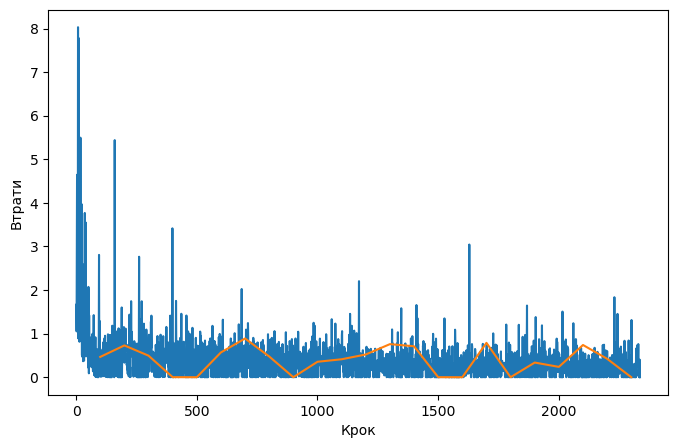

In [377]:
df = pd.read_csv('full_phrases.csv')
plt.figure(figsize=(8,5))

plt.plot(df['step'], df['train_loss'])
plt.plot(df[~df['valid_loss'].isna()]['step'], df[~df['valid_loss'].isna()]['valid_loss'])
plt.xlabel("Крок")
plt.ylabel("Втрати")
#plt.legend(["Тренування", "Валідація"])
plt.show()

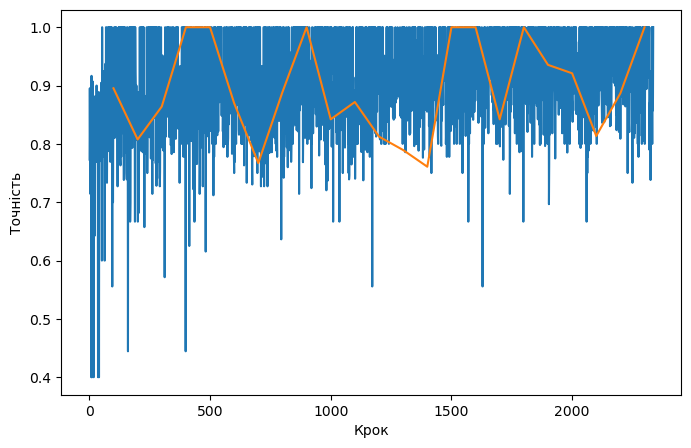

In [365]:
plt.figure(figsize=(8,5))
plt.plot(df['step'], df['train_accuracy'])
plt.plot(df[~df['valid_mean_token_accuracy'].isna()]['step'], df[~df['valid_mean_token_accuracy'].isna()]['valid_mean_token_accuracy'])
plt.xlabel("Крок")
plt.ylabel("Точність")

plt.show()

In [307]:
df[~df['valid_loss'].isna()]

,step,train_loss,train_accuracy,valid_loss,valid_mean_token_accuracy
99,100,0.56991,0.86479,0.46591,0.89535
199,200,0.33399,0.80000,0.72935,0.80756
299,300,0.36428,0.89474,0.49456,0.86400
399,400,0.34540,0.90476,0.00144,1.00000
499,500,0.00037,1.00000,0.00035,1.00000
599,600,0.93251,0.75000,0.56902,0.86957
699,700,0.00000,1.00000,0.88819,0.76716
799,800,0.67838,0.77273,0.47589,0.88889
899,900,0.67176,0.81132,0.00027,1.00000
999,1000,0.32914,0.89655,0.35435,0.84211


#### Techniques only

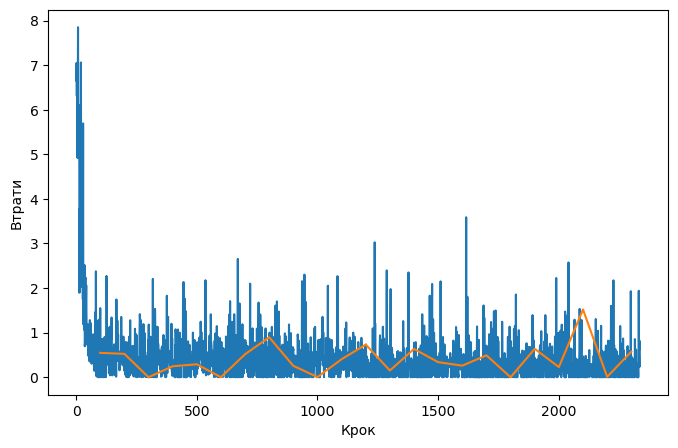

In [379]:
df = pd.read_csv('classification_only.csv')
plt.figure(figsize=(8,5))
plt.plot(df['step'], df['train_loss'])
plt.plot(df[~df['valid_loss'].isna()]['step'], df[~df['valid_loss'].isna()]['valid_loss'])
plt.xlabel("Крок")
plt.ylabel("Втрати")
plt.show()

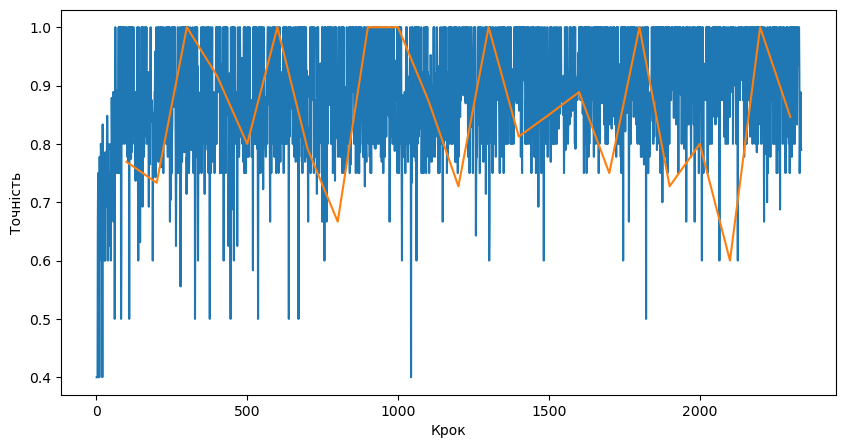

In [381]:
plt.figure(figsize=(10,5))
plt.plot(df['step'], df['train_accuracy'])
#sns.lineplot(x='step', y='train_accuracy', data=df)
plt.plot(df[~df['valid_mean_token_accuracy'].isna()]['step'], df[~df['valid_mean_token_accuracy'].isna()]['valid_mean_token_accuracy'])
plt.xlabel("Крок")
plt.ylabel("Точність")
plt.show()

#### Character spans

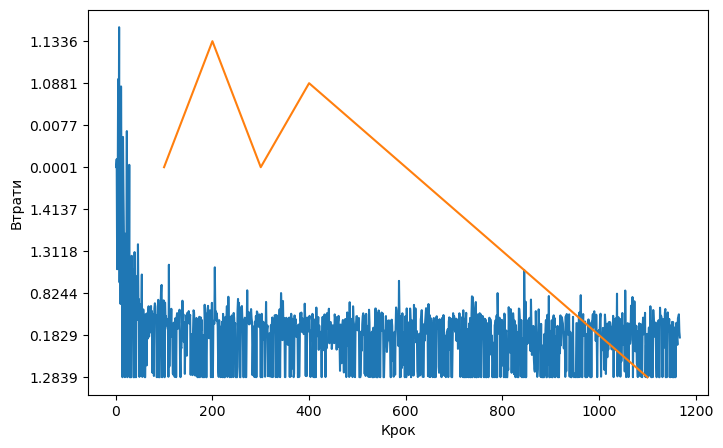

In [448]:
#df = pd.read_csv('original_characters.csv')
plt.figure(figsize=(8,5))
#plt.plot(df['Step'], df['Training loss'])
plt.plot(df['Step'], df['Training loss'])
#plt.plot(df[~df['Validation loss'].isna()]['Step'], df[~df['Validation loss'].isna()]['Validation loss'])

plt.plot(fragment_df[~fragment_df['Validation loss'].isna()]['Step'], fragment_df[~fragment_df['Validation loss'].isna()]['Validation loss'])
plt.xlabel("Крок")
plt.ylabel("Втрати")
plt.show()

In [438]:
fragment_df = df[df['Validation loss'] != '-']

In [442]:
fragment_df

,Time,Step,Training loss,Validation loss,Full Validation loss
67,22:39:46,1100.0,0.0001,1.2839,-
167,22:38:00,1000.0,1.1238,0.1829,-
267,22:36:13,900.0,1.1025,0.8244,-
367,22:34:21,800.0,1.2167,1.3118,-
467,22:32:31,700.0,1.4549,1.4137,-
567,22:30:41,600.0,1.4059,0.0001,-
667,22:28:54,500.0,1.1181,0.0077,-
767,22:27:07,400.0,1.3691,1.0881,-
867,22:25:14,300.0,0.0001,0.0001,-
967,22:23:24,200.0,0.4852,1.1336,-


In [396]:
df[~df['Validation loss'].isna()]

,Time,Step,Training loss,Validation loss,Full Validation loss
0,22:41:02,1167.0,0.9465,-,-
1,22:40:59,1166.0,1.0825,-,-
2,22:40:59,1165.0,1.4970,-,-
3,22:40:59,1164.0,1.4396,-,-
4,22:40:58,1163.0,1.3971,-,-
...,...,...,...,...,...
1162,22:19:50,5.0,7.0964,-,-
1163,22:19:50,4.0,4.0654,-,-
1164,22:19:50,3.0,2.5710,-,-
1165,22:19:45,2.0,5.1906,-,-


In [418]:
df

,Time,Step,Training loss,Validation loss,Full Validation loss
0,22:41:02,1167.0,0.9465,,-
1,22:40:59,1166.0,1.0825,,-
2,22:40:59,1165.0,1.4970,,-
3,22:40:59,1164.0,1.4396,,-
4,22:40:58,1163.0,1.3971,,-
...,...,...,...,...,...
1163,22:19:50,4.0,4.0654,,-
1164,22:19:50,3.0,2.5710,,-
1165,22:19:45,2.0,5.1906,,-
1166,22:19:44,1.0,5.0026,,-
